In This Project , I will fit a neural network to "noisy" 3D sinusoidal data.

In [14]:
#imports
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import numpy as np
import pandas as pd
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import os

# Where to save the figures
PROJECT_ROOT_DIR = "."
FOLDER = "figures"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, FOLDER)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


In [15]:
#import data
data = pd.read_csv("3DSinusoidalANN.csv")
data_df = data
#split data, test size 20%, x &z training, y response, set random state
X_train, X_test, y_train, y_test = train_test_split(data[['x', 'z']].values, data['y'].values, test_size=0.2, random_state=42)
#scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
#define function that accepts a DF 
#use Scatter3D to plot the data

def plot3Ddata(data_df):
    fig = plt.figure(figsize=(15, 12))
    
    # Subplot 1
    ax1 = fig.add_subplot(221, projection='3d')
    scatter1 = ax1.scatter(data_df['z'], data_df['x'], data_df['y'], c='blue')
    ax1.set_xlabel('Y')
    ax1.set_ylabel('X')
    ax1.set_zlabel('Z')
    ax1.set_title('View 1')
    ax1.view_init(elev=0, azim=0)
    
    # Subplot 2
    ax2 = fig.add_subplot(222, projection='3d')
    scatter2 = ax2.scatter(data_df['x'], data_df['z'], data_df['y'], c='blue')
    ax2.set_xlabel('Y')
    ax2.set_ylabel('X')
    ax2.set_zlabel('Z')
    ax2.set_title('View 2')
    ax2.view_init(elev=45, azim=90)
    
    # Subplot 3
    ax3 = fig.add_subplot(223, projection='3d')
    scatter3 = ax3.scatter(data_df['y'], data_df['x'], data_df['z'], c='blue')
    ax3.set_xlabel('X')
    ax3.set_ylabel('Y')
    ax3.set_zlabel('Z')
    ax3.set_title('View 3')
    ax3.view_init(elev=45, azim=90)
    
    # Subplot 4
    ax4 = fig.add_subplot(224, projection='3d')
    scatter4 = ax4.scatter(data_df['x'], data_df['y'], data_df['z'], c='blue')
    ax4.set_xlabel('X')
    ax4.set_ylabel('Y')
    ax4.set_zlabel('Z')
    ax4.set_title('View 4')
    ax4.view_init(elev=90, azim=-90)
    
    plt.tight_layout()
    plt.show()


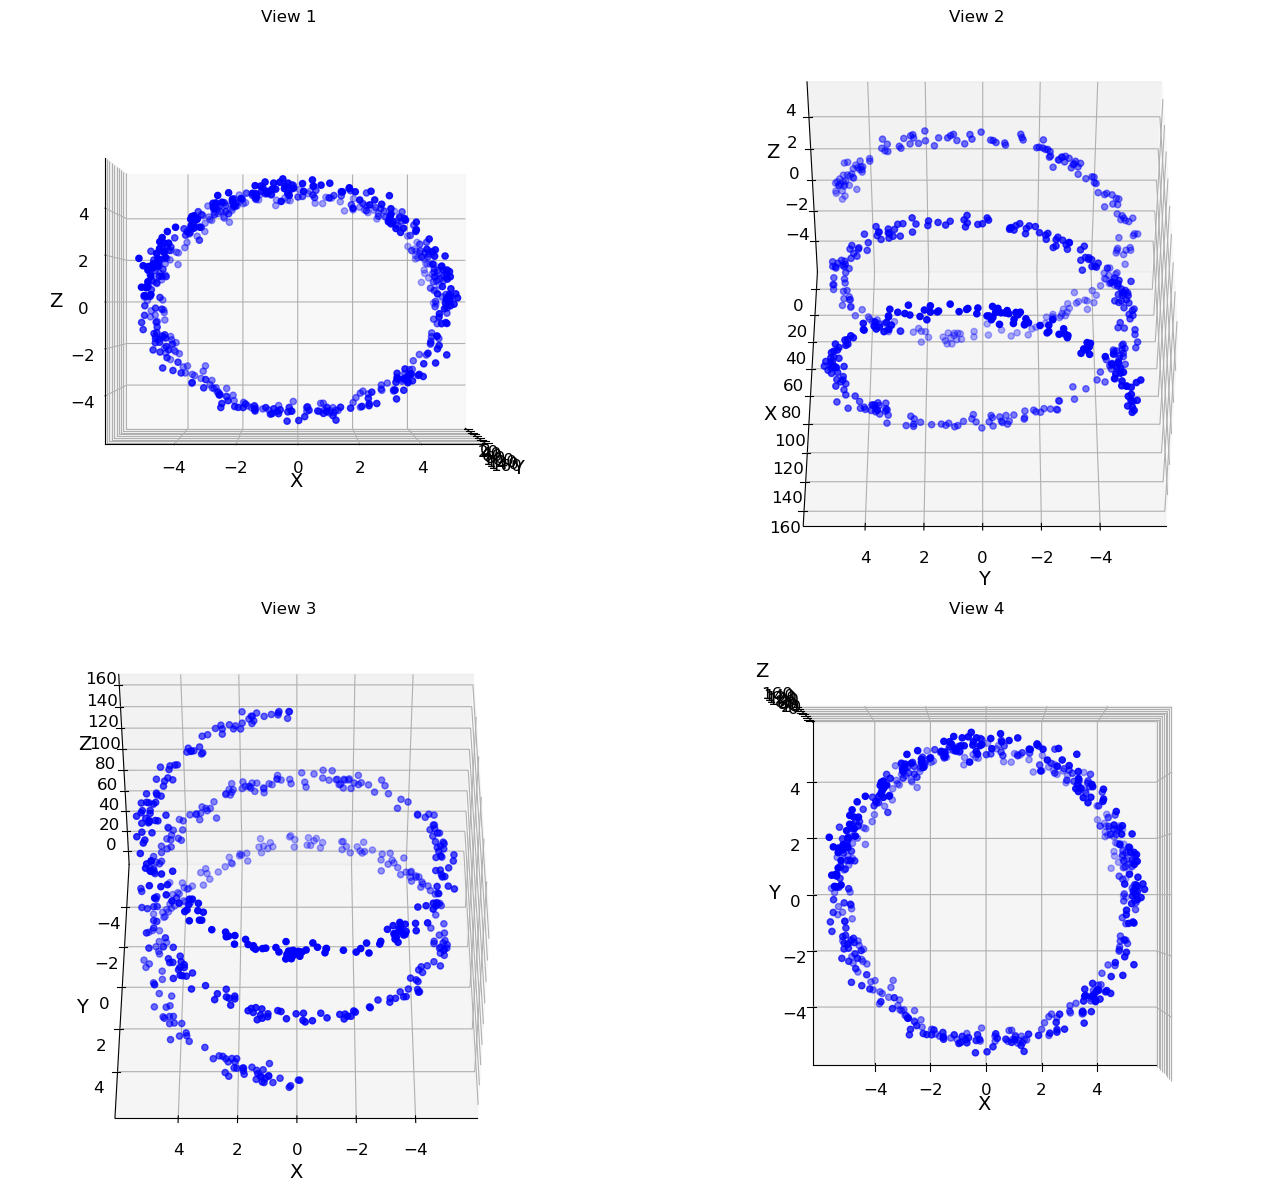

In [17]:
plot3Ddata(data_df)

In [18]:
#Fit a Sequentialmodel to the data, build an ANN that models the data
model = Sequential([
    Dense(units=64, activation='relu', input_shape=(2,)),
    Dense(units=32, activation='relu'),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train_scaled, y_train, epochs=100, verbose=0)

C:\Users\jaycz\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
#use predict to make a prediction for y using training data
fit_x = X_train_scaled[:, 0]
fit_z = X_train_scaled[:, 1]
fit_y = model.predict(X_train_scaled).flatten()

sort_indices = np.argsort(fit_x)
fit_x_sorted = fit_x[sort_indices]
fit_z_sorted = fit_z[sort_indices]
fit_y_sorted = fit_y[sort_indices]

scat_x = X_train_scaled[:, 0]
scat_y = y_train
scat_z = X_train_scaled[:, 1]

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [20]:
#define a function to plot the data as well as the prediction curve.
def plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z):
    fig = plt.figure(figsize=(15, 12))
    
    # Subplot 1
    ax1 = fig.add_subplot(221, projection='3d')
    ax1.scatter(scat_z, scat_x, scat_y, c='blue', label='Training Data')
    ax1.plot(fit_z_sorted, fit_x_sorted, fit_y_sorted, c='black', label='Model Prediction')
    ax1.set_xlabel('Y')
    ax1.set_ylabel('X')
    ax1.set_zlabel('Z')
    ax1.set_title('View 1')
    ax1.view_init(elev=0, azim=0)
    
    # Subplot 2
    ax2 = fig.add_subplot(222, projection='3d')
    ax2.scatter(scat_x, scat_z, scat_y, c='blue', label='Training Data')
    ax2.plot(fit_x_sorted, fit_z_sorted, fit_y_sorted, c='black', label='Model Prediction')
    ax2.set_xlabel('Y')
    ax2.set_ylabel('X')
    ax2.set_zlabel('Z')
    ax2.set_title('View 2')
    ax2.view_init(elev=45, azim=90)
    
    # Subplot 3
    ax3 = fig.add_subplot(223, projection='3d')
    ax3.scatter(scat_y, scat_x, scat_z, c='blue', label='Training Data')
    ax3.plot(fit_y_sorted, fit_x_sorted, fit_z_sorted, c='black', label='Model Prediction')
    ax3.set_xlabel('X')
    ax3.set_ylabel('Y')
    ax3.set_zlabel('Z')
    ax3.set_title('View 3')
    ax3.view_init(elev=45, azim=90)
    
    # Subplot 4
    ax4 = fig.add_subplot(224, projection='3d')
    ax4.scatter(scat_x, scat_y, scat_z, c='blue', label='Training Data')
    ax4.plot(fit_x_sorted, fit_y_sorted, fit_z_sorted, c='black', label='Model Prediction')
    ax4.set_xlabel('X')
    ax4.set_ylabel('Y')
    ax4.set_zlabel('Z')
    ax4.set_title('View 4')
    ax4.view_init(elev=90, azim=-90)
    plt.show()


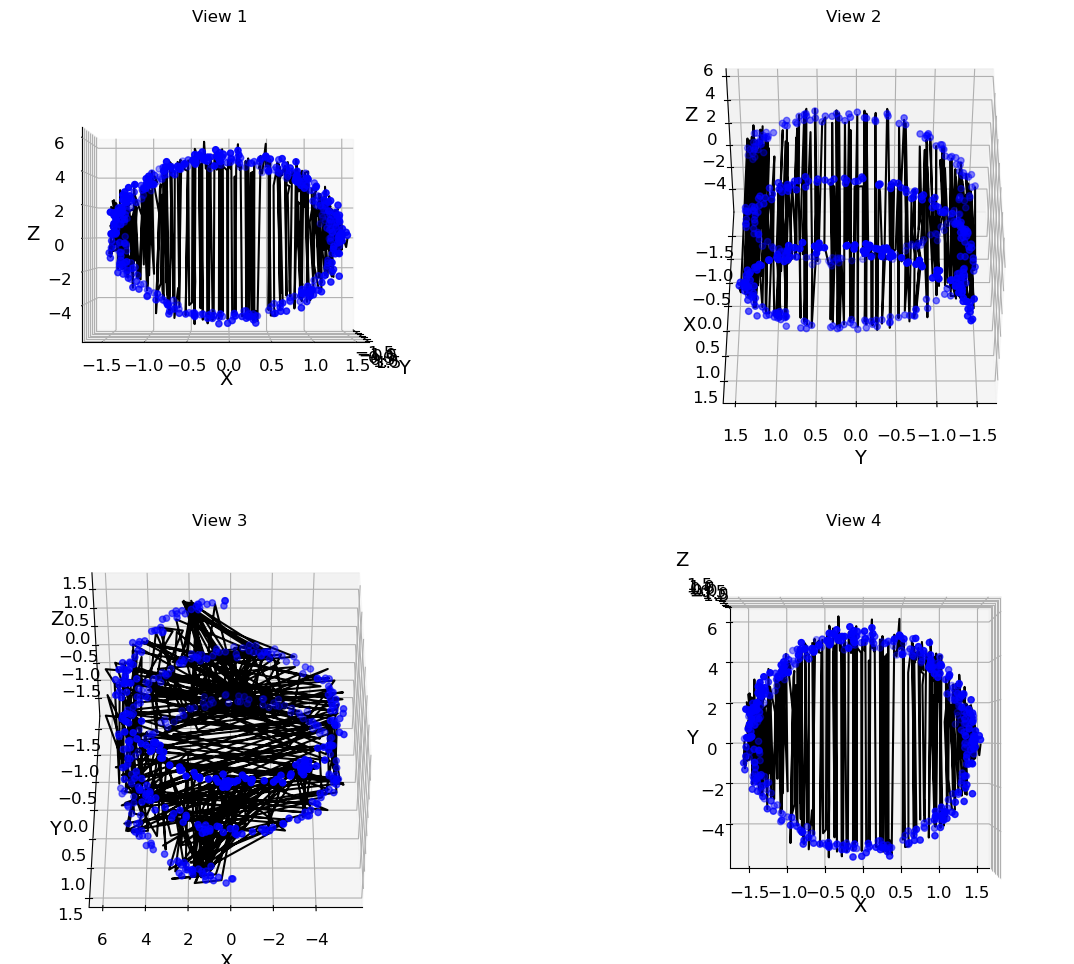

In [21]:
plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)

In [22]:
#cumpute, round, and print our MSE as our generalization error
y_pred = model.predict(X_test_scaled).flatten()
generalization_error = mean_squared_error(y_test, y_pred)
print(f"Generalization Error (MSE): {generalization_error:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Generalization Error (MSE): 0.4834
